In [13]:
## Import necessary library for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [22]:
## Load data in pandas df
df = pd.read_csv(r"C:\Users\lenovo\Downloads\Pandas-Data-Science-Tasks\Placement_Data.csv", index_col=0)
df.head(3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


In [23]:
## Check nan/missing values in each columns
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [24]:
## Check detail description about numeric variables 
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [25]:
## Check data type and shape of every column 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 18.5+ KB


## Explanatory Data Analysis

In [34]:
## Check average or mean of numeric variable for unique values of status 
df.groupby(["status"]).mean()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
status,,,,,,
Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836,NaN
Placed,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405


In [26]:
## Check how many students have been placed or not
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [27]:
## Create another dataframe of only placed students 
df_placed = df.dropna(how="any")
df_placed.shape

(148, 14)

In [29]:
## Check number of variable available under numerical data
numeric_data = df_placed.select_dtypes(exclude = [object])
numeric_data.shape

(148, 6)

In [31]:
## Find correltaion between numerical variables in numeric dataframe
corr_matrix = numeric_data.corr()
corr_matrix

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.293416,0.380657,0.317892,0.430560,0.035330
hsc_p,0.293416,1.000000,0.221307,0.284672,0.329983,0.076819
degree_p,0.380657,0.221307,1.000000,0.217683,0.494093,-0.019272
etest_p,0.317892,0.284672,0.217683,1.000000,0.284143,0.178307
mba_p,0.430560,0.329983,0.494093,0.284143,1.000000,0.175013
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


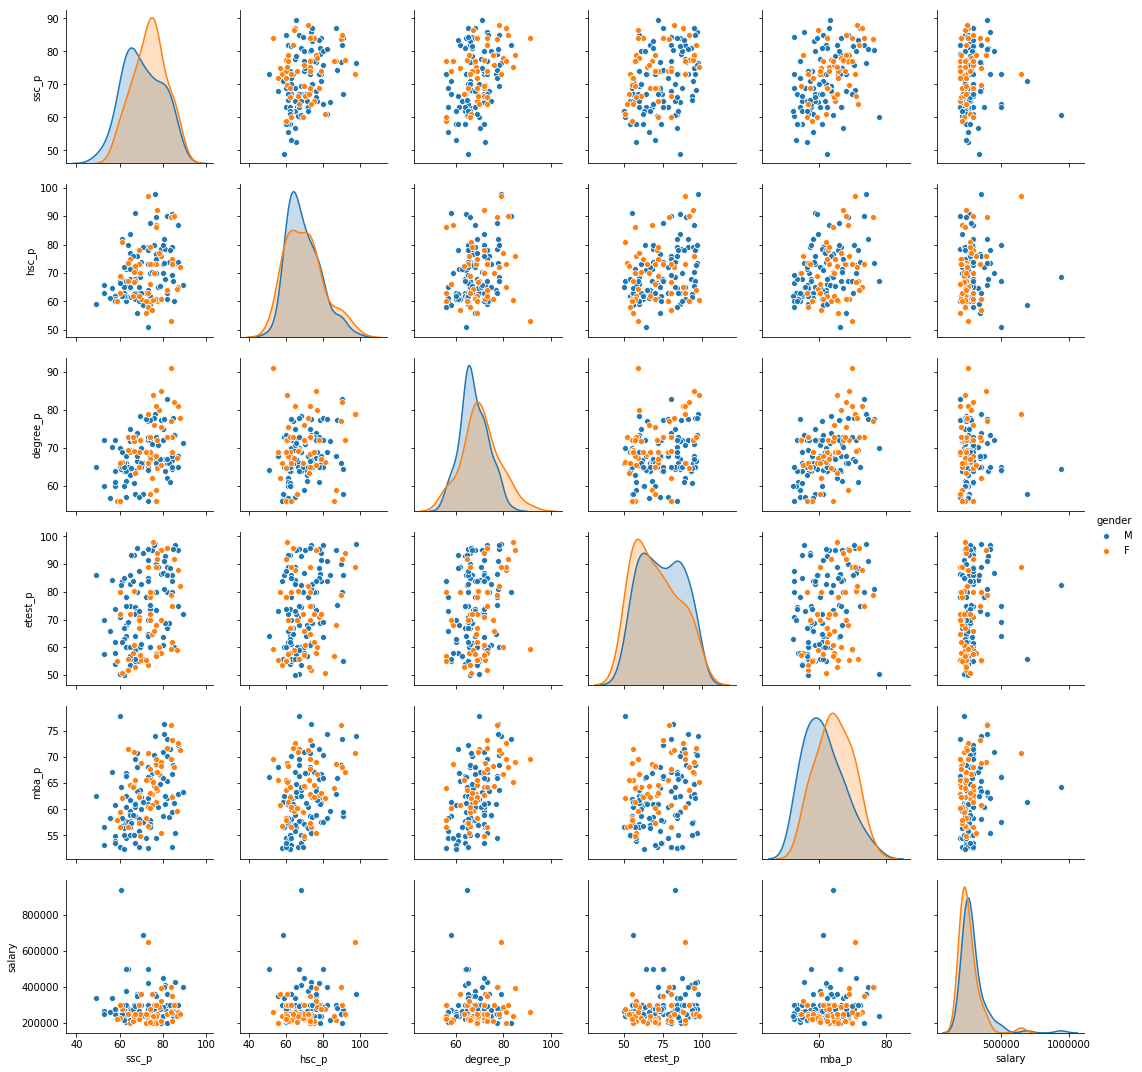

In [35]:
## Pairwise Plot :- Used to plot relationship in a dataset
## Creates scatterplots for join relationship and histogram for univariate distributions 
## Relationship of percentage in degree or other exams & salary with gender of an student 

sns.pairplot(df_placed, kind="scatter", hue="gender")
plt.show()